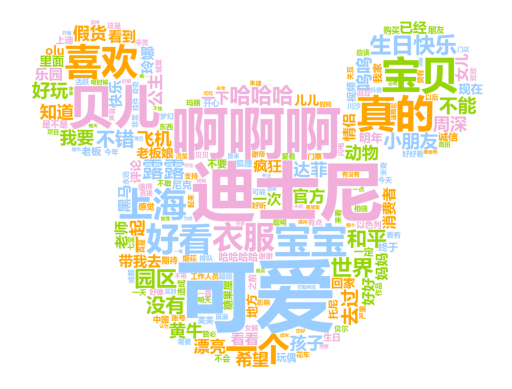

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    color_options = [
        (242, 174, 219),  # 粉色
        (153, 204, 255),  # 蓝色
        (255, 165, 0),    # 橙色
        (149, 213, 8)     # 绿色
    ]
    return random.choice(color_options)

# 读取词频 CSV 文件
df = pd.read_csv('disney_topWords.csv')

# 检查列名
if '词语' not in df.columns or '词频' not in df.columns:
    raise ValueError("CSV文件中必须包含'词语'和'频率'两列")

# 创建词频字典
frequencies = dict(zip(df['词语'], df['词频']))

# 打开形状图片
img = Image.open(r'E:\python\disney\disney\m1.png')
img_array = np.array(img)

# 生成词云
wc = WordCloud(
    font_path=r'E:\python\disney\disney\msyhbd.ttc',
    background_color='white',
    width=1600,
    height=1200,
    mask=img_array,
    color_func=color_func
)

# 从词频生成词云
wc.generate_from_frequencies(frequencies)

# 显示词云图
plt.imshow(wc)
plt.axis('off')

# 保存图片并设置dpi
plt.savefig('wordcloud.png', dpi=300)
plt.show()